# Networks

*This notebook includes adapted content from the [NetworkX](https://melaniewalsh.github.io/Intro-Cultural-Analytics/06-Network-Analysis/01-Network-Analysis.html#) and [Mapping](https://melaniewalsh.github.io/Intro-Cultural-Analytics/07-Mapping/01-Mapping.html#) sections of Melanie Walsh's online book on Python.*

This week, we'll see a few examples of network analysis. Network analysis is the study of data in the form of graphs (nodes and edges), and it is especially helpful for understanding entity-to-entity relationships between people, companies, countries, etc. Any time there is a "connection" between two entities, network analysis is typically going to be quite useful.

## Network Basics

The industry standard Python library for network analysis is [NetworkX](https://networkx.org/documentation/stable/install.html). You'll want to install it on the appropriate environment, using the instructions in the linked page. (More than likely, you'll pick the first `pip install networkx[default]` install option.)

In [14]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('whitegrid')
%config InlineBackend.figure_formats = ['svg']

## Data: Game of Thrones

For this notebook, we'll use the Game of Thrones (GOT) network data originally compiled by [A. Beveridge and J. Shan, "Network of Thrones," Math Horizons Magazine , Vol. 23, No. 4 (2016), pp. 18-22](https://www.maa.org/sites/default/files/pdf/Mathhorizons/NetworkofThrones%20%281%29.pdf).

### Data Description

The *got-nodes* CSV contains 107 different characters, and the *got-edges* CSV contains 353 weighted relationships between those characters, which were calculated based on how many times two characters' names appeared within 15 words of one another in the novel. For more on the methodology, see the article linked above.

> *Note: In general, network data is provided in two parts: edges (where each row has two node IDs to be connected, and sometimes a weight or direction), and nodes (where each row has a node ID and information about each node). Otherwise, you may have to manipulate your data so that it meets these criteria.*

This Game of Thrones data lends itself well to basic social network analysis because there are a lot of characters (and yet not *too many* characters) and because, as the authors claim, these characters are "scattered geographically and enmeshed in their own social circles," such as various noble houses. If you are unacquainted with GOT, check out the [Wikipedia page](https://en.wikipedia.org/wiki/A_Storm_of_Swords) or [this 8-minute beginner's guide to the show](https://www.youtube.com/watch?v=6N4gEJ_ED98) (warning: language).

### Load into pandas

In [15]:
got_df = pd.read_csv('./data/got-edges.csv')

In [16]:
got_df

,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5
...,...,...,...
347,Walder,Petyr,6
348,Walder,Roslin,6
349,Walton,Jaime,10
350,Ygritte,Qhorin,7


As is typical for any *edge* data for a network:

- `Source` should contain the node ID where the edge "begins"
- `Target` is the node ID where the edge "ends"
- `Weight` is the weight of that note (e.g., distance, amount, etc.)

### Load a Network

We can load a network into NetworkX from a pandas dataframe, as long as we indicate the source, target, and weight columns.

In [17]:
G = nx.from_pandas_edgelist(got_df, 'Source', 'Target', 'Weight')

## Draw a Simple Network

Though NetworkX is not built to be a network visualizatoin tool, it still provides several [options for visualizing graphs](https://networkx.org/documentation/latest/auto_examples/index.html) with `.draw`, which uses Matplotlib (and thereby Seaborn) as a backend framework for the visualizations. Alternatively, you could use a more sophisticated tool such as [pyvis](https://pyvis.readthedocs.io/en/latest/tutorial.html#networkx-integration), or Gephi.

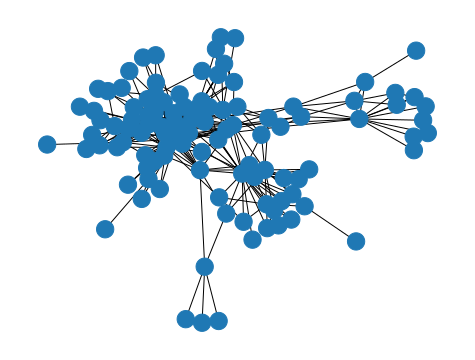

In [18]:
nx.draw(G)

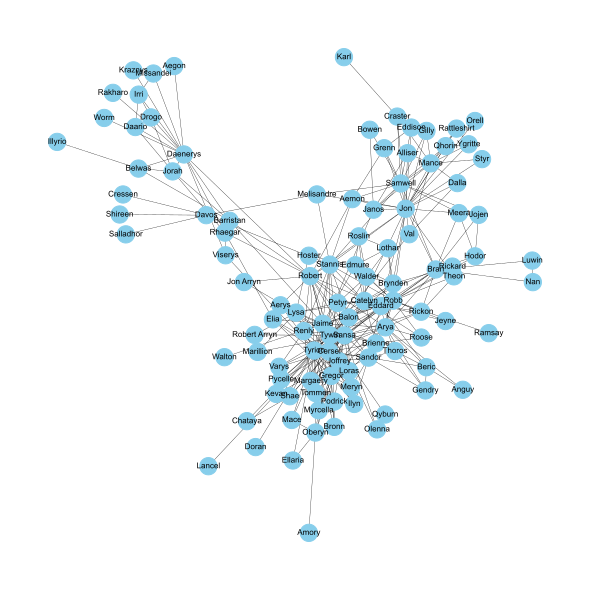

In [19]:
plt.figure(figsize=(8,8))
nx.draw(G, with_labels=True, node_color='skyblue', width=.3, font_size=8)

## Nodes and Edges

Network nodes and edges (in NetworkX) are just Python objects with attributes assigned to them (as a dictionary). Below are a few key terms used with graphs (i.e., networks).

Term | Description
--- | ---
node | a point on the network
edge | a connection between two nodes
neighbor | a node connected to another node
attribute | a Python object associated with a node or edge
weight\* | a *numeric* value associated with an edge (e.g., the "strength" of a connection)
degree\* | the number of edges entering or leaving a node (i.e., `in_degree + out_degree`)
size\* | either the number of edges or the sum of the edge-weights for either a node or the whole graph
centrality\* | The fraction of nodes in a graph to which one node is connected

*\*These are special attributes of nodes and edges with specific names used by NetworkX.*

The **degree** is a node-based value, and it represents the number of edges that are entering or exiting the node. For example, we can use this number (for each node) to discover which character has the most number of connections in the network.

In [20]:
G.degree('Aemon')

5

**Edge** is just the "line" connecting two nodes, and it is defined *by* the two nodes it connects, i.e., `(source, target)`.

In [21]:
# all edges which "start" at node `Aemon`
G.edges('Aemon')

EdgeDataView([('Aemon', 'Grenn'), ('Aemon', 'Samwell'), ('Aemon', 'Jon'), ('Aemon', 'Robert'), ('Aemon', 'Stannis')])

In [22]:
# Just the nodes connected to `Aemon`
[n for n in G.neighbors('Aemon')]

# does the same thing!
# [k[1] for k in G.edges('Aemon')]

['Grenn', 'Samwell', 'Jon', 'Robert', 'Stannis']

In [23]:
# all edges which start at `Aemon` OR `Grenn`
G.edges(['Aemon', 'Grenn'])

EdgeDataView([('Aemon', 'Grenn'), ('Aemon', 'Samwell'), ('Aemon', 'Jon'), ('Aemon', 'Robert'), ('Aemon', 'Stannis'), ('Grenn', 'Eddison'), ('Grenn', 'Jon'), ('Grenn', 'Samwell')])

The **AtlasView** in NetworkX allows us to get an idea for the nodes and edges connected to a single node.

In [24]:
G['Aemon']

AtlasView({'Grenn': {'Weight': 5}, 'Samwell': {'Weight': 31}, 'Jon': {'Weight': 30}, 'Robert': {'Weight': 4}, 'Stannis': {'Weight': 4}})

In [25]:
# access just the *edge* between `Aemon` and `Grenn`
G['Aemon']['Grenn']

{'Weight': 5}

Notice, `'Weight'` is already assigned as an attribute for each edge, by definition.

By default, the **size** is the number of edges in a graph. But, we can also use it to calculate the sum of the weights.

In [26]:
# number of edges in the graph
G.size()

352

In [27]:
G.size(weight='Weight')

4324.0

Similarly, if we assign the "Weight" attribute of each edge as the `weight`, we get the sum of all weights for some node.

In [28]:
G.degree('Aemon', weight="Weight")

74

The **name (ID)** for any node is not an explicit attribute, but it is represented in the definition of the graph. E.g., here, we defined each node *as* the name of the character. We can use that name (or ID) to access the element of the graph.

In [29]:
# all attributes currently assigned to this node
G.nodes['Aemon']

{}

We can assign attributes to nodes using a dictionary of values with the syntax `{node_id: attr_value}`, using `nx.set_node_attributes()`.

In [30]:
name_length = {n:len(n) for n in G.nodes}
nx.set_node_attributes(G, name='name_length', values=name_length)

In [31]:
G.nodes['Aemon']

{'name_length': 5}

## Node Analysis

### Degrees

Make a Pandas dataframe from the degree data, then sort from highest to lowest

In [32]:
degree_df = pd.DataFrame(G.degree, columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df.head()

,node,degree
6,Tyrion,36
21,Jon,26
50,Sansa,26
48,Robb,25
4,Jaime,24


Plot the nodes with the highest degree values

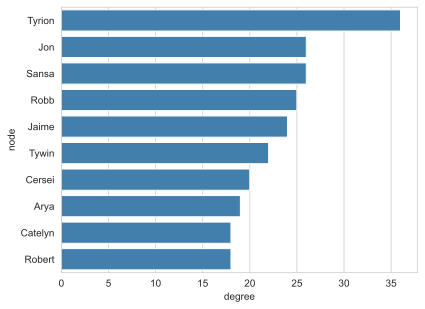

In [33]:
num_nodes_to_inspect = 10

sns.barplot(degree_df.iloc[:num_nodes_to_inspect],
            x='degree', y='node', color='#3182bd');

### Calculate Weighted Degree

Recall, we can calculate the number of connections for each node *and* factor in edge weight using `G.degree([node], weight='Weight')`. We can do the same for the whole graph using `G.degree(weight='Weight')`.

In [34]:
weighted_degree_df = pd.DataFrame(G.degree(weight='Weight'), columns=['node', 'weighted_degree'])
weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degree', ascending=False)
weighted_degree_df.head()

,node,weighted_degree
6,Tyrion,551
21,Jon,442
50,Sansa,383
4,Jaime,372
15,Bran,344


Plot the nodes with the highest weighted degree values

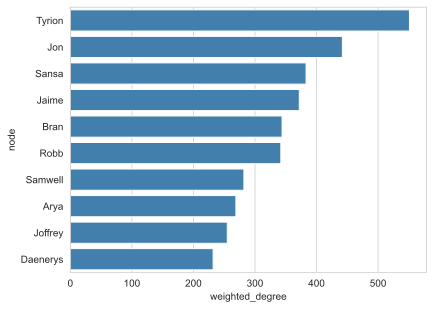

In [35]:
num_nodes_to_inspect = 10

sns.barplot(weighted_degree_df.iloc[:num_nodes_to_inspect],
            y='node', x='weighted_degree', color='#3182bd');

### Calculate Centrality Scores

There are multiple kinds of **[centrality](https://networkx.org/documentation/stable/reference/algorithms/centrality.html)**. The most common **degree centrality** is the fraction nodes to which it is connected. E.g., if a node's degree centrality score is 0.5, then it is connected to 50% of all the nodes in the graph. We can use this to understand what nodes connect to the most other nodes in the network.

*Note: in NetworkX, **we need to calculate centrality** scores. After the calculation, we can assign them to nodes.*

In [36]:
nx.set_node_attributes(G, name='degree_centrality', values=nx.degree_centrality(G))

In [37]:
G.nodes['Aemon']

{'name_length': 5, 'degree_centrality': 0.04716981132075471}

In [38]:
# get some data from each node
df_centrality = pd.DataFrame(G.nodes(data='degree_centrality'), 
                              columns=['node', 'degree_centrality'])

# sort values
df_centrality = df_centrality.sort_values(by='degree_centrality', ascending=False)
df_centrality.head()

,node,degree_centrality
6,Tyrion,0.339623
21,Jon,0.245283
50,Sansa,0.245283
48,Robb,0.235849
4,Jaime,0.226415


Plot the nodes with the highest betweenness centrality scores

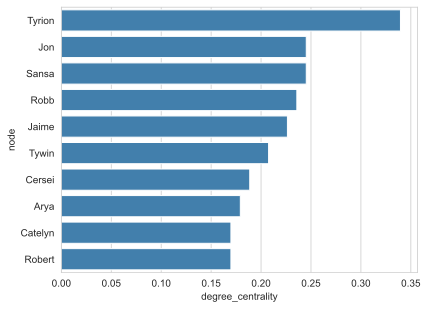

In [39]:
num_nodes_to_inspect = 10
sns.barplot(df_centrality.iloc[:num_nodes_to_inspect],
            y='node', x='degree_centrality', color='#3182bd');

### Communities

There are multiple ways to define a **[community](https://networkx.org/documentation/stable/reference/algorithms/community.html)**, but it is essentially an interesting subgraph of graph `G`. For example, a **modularity-based community** is defined by starting with each node as their own "communities", then iteratively pairing them with neighbors by picking the neighbor which increases [modularity](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html) the most. We do this until some optimal number of communities is reached.

In [40]:
from networkx.algorithms import community

In [41]:
communities = community.greedy_modularity_communities(G)

In [42]:
len(communities)

5

In [43]:
communities[4]

frozenset({'Anguy', 'Beric', 'Gendry', 'Thoros'})

Communities are *partitions* of the graph. This means that **any node can only be assigned a single community.** So, we'll assign community labels to each node by creating a dictionary of nodes and the community to which their assigned.

In [44]:
# Create empty dictionary
modularity_class = {}

for community_number, community in enumerate(communities):
    for name in community:
        modularity_class[name] = community_number
        
modularity_class['Anguy']

4

Then, we add the modularity class to the network as an attribute.

In [45]:
nx.set_node_attributes(G, modularity_class, 'modularity_class')

We plot these communities as a **subgraph** of the original graph, based the attribute we just created.

In [46]:
mod_class = 1
G_sub = [n for n in G.nodes if G.nodes[n]['modularity_class'] == mod_class]
G_sub = G.subgraph(G_sub)
print(f"num edges in modularity class {mod_class} = {G_sub.size()}")

num edges in modularity class 1 = 62


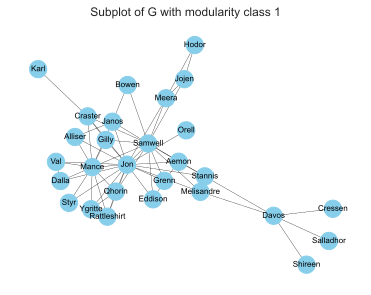

In [47]:
plt.subplot(title=f"Subplot of G with modularity class {mod_class}")
nx.draw(G_sub, with_labels=True, node_color='skyblue', width=.3, font_size=8)

### Plotting Relationships

To create a pandas DataFrame of all network attributes, we'll use the *dictionary* which comes from `G.noes` or `G.nodes(data=True)`. Since the output of this is a dictionary, where the `index` is the node ID, we'll use `pd.DataFrame.from_dict` to get the resulting DataFrame.

In [48]:
df_nodes = pd.DataFrame.from_dict(G.nodes, orient='index')

In [49]:
df_nodes[df_nodes['modularity_class'] == 4]

,name_length,degree_centrality,modularity_class
Anguy,5,0.018868,4
Beric,5,0.056604,4
Gendry,6,0.037736,4
Thoros,6,0.047170,4


/Users/manojdannana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/manojdannana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


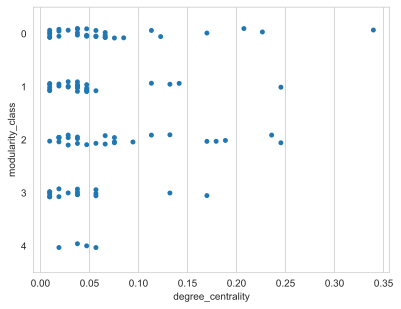

In [50]:
sns.stripplot(df_nodes, x='degree_centrality', y='modularity_class', orient='h');

## Saving a Network

We can save our graph as a GraphML file. This will be helpful when we want to load it into other software such as Gephi.

In [51]:
nx.write_graphml(G, 'data/GOT-network.graphml')

## Gephi

There is much more we can analyze in a graph, but NetworkX is quite confining when it comes to graph analysis *and visualization*. So, we'll load our graph into [Gephi](https://gephi.org/), which is an open source tool for visualizing graphs. **Gephi is recommended over any Python package for in-depth graph visualization.** This is mostly because of its robust functionality, ease of use, and the fact that it won't clutter up your notebook.

1. Navigate to the [Gephi Downloads Page](https://gephi.org/users/download/), and download the appropriate package, then install it on your machine.
2. Take a look at the [Gephi Quick Start Guide](http://www.slideshare.net/gephi/gephi-quick-start) for some tips and tricks for using the application (it's pretty straightforward).
3. Open Gephi, and navigate to the *.graphml* file saved above, and explore it!

*See [this](https://www.martingrandjean.ch/gephi-introduction/) for a more in depth discussion of Gephi.*

# Mapping

In this section, we'll use GeoPy to analyze and visualize geographic data.

## Geocoding

To **geocode** data is to calculate coordinates from addresses or place names. In this notebook, we'll use the [GeoPy](https://geopy.readthedocs.io/en/stable/#) Python package to geocode our data. GeoPy makes it easier to use a range of third-party [geocoding API services](https://geopy.readthedocs.io/en/stable/#), such as Google, Bing, ArcGIS, Nominatim, and OpenStreetMap. Here, we'll use the [Nominatim](https://nominatim.org/) service (and its [documentation](https://nominatim.org/release-docs/latest/)) since it doesn't require an API key.

First, you'll need to **install GeoPy** with `pip install geopy` in the same environment this notebook is running.

In [52]:
from geopy.geocoders import Nominatim

### Nominatim & OpenStreetMap

Nominatim (which means "name" in Latin) uses [OpenStreetMap data](https://www.openstreetmap.org/relation/174979) to match addresses with geopgraphic coordinates. We don't need an API key to use Nominatim, but we will need to [create a unique application name](https://operations.osmfoundation.org/policies/nominatim/) (in the code, below). 

Here we're initializing Nominatim as a variable called `geolocator`. Change the application name below to your own application name:

In [53]:
geolocator = Nominatim(user_agent="map_501", timeout=2)

To geocode an address or location, we simply use the `.geocode()` function:

In [54]:
location = geolocator.geocode("IUPUI Indianapolis, IN")

In [55]:
location

Location(Rotary Park Space at IUPUI, Indianapolis, Marion County, Indiana, United States, (39.77640825, -86.18210328075625, 0.0))

In [56]:
type(location)

geopy.location.Location

### Get Address

In [57]:
print(location.address)

Rotary Park Space at IUPUI, Indianapolis, Marion County, Indiana, United States


### Get Latitude and Longitude

In [58]:
print(location.latitude, location.longitude)

39.77640825 -86.18210328075625


### Get "Importance" Score

The Nominatim [importance score](https://nominatim.org/release-docs/latest/customize/Importance/) is an attempt to measure the relevance of a particular result given a location search. This is akin to the list of search results from Google, rank-oredered based on some kind of likelihood that a result is actually what you're looking for.

In [59]:
print(f"Importance: {location.raw['importance']}")

Importance: 0.15000999999999998


### Get Class and Type

In [60]:
print(f"Class: {location.raw['class']} \nType: {location.raw['type']}")

Class: leisure 
Type: park


### Get Multiple Possible Matches

In [61]:
possible_locations = geolocator.geocode("IUPUI", exactly_one=False)

In [62]:
pd.DataFrame({'address': [k.address for k in possible_locations],
              'class': [k.raw['class'] for k in possible_locations],
              'importance': [k.raw['importance'] for k in possible_locations]})

,address,class,importance
0,"The Arbor Garden at IUPUI, Historic Ransom Pla...",leisure,0.15001
1,"Rotary Park Space at IUPUI, Indianapolis, Mari...",leisure,0.15001
2,"Town Homes at IUPUI, Limestone Street, Indiana...",building,0.00001
3,"IUPUI Campus Center, University Boulevard, His...",amenity,0.00001
4,"IUPUI Campus Center, 420, University Boulevard...",building,0.00001
5,"IUPUI Parking Services, 1004, West Vermont Str...",office,0.00001
6,"IUPUI Riverwalk Apartments, 420, University Bo...",landuse,0.00001
7,"IUPUI Police Department, 1232, West Michigan S...",amenity,0.00001


## Geocoding a Column

To start exploring, let's read in a list of museums in the United States.

In [63]:
# URL active as of Sep 2023
df_museums = pd.read_html("https://bigroads.com/top100-museums.html", match="MUSEUM NAME")[1]

In [64]:
df_museums.rename(columns={"STATE": 'state',
                           "MUSEUM NAME": 'museum_name',
                           "MUSEUM TYPE(S)": 'museum_type',
                           "TOWN / CITY": "museum_city"},
                 inplace=True)

df_museums.head()

,state,museum_name,museum_type,museum_city
0,Alabama,Barber Vintage Motorsports Museum,Auto/Transportation Museum,Birmingham
1,Alabama,USS Alabama Battleship Memorial Park,Boat Museum & Military Museum,Mobile
2,Alaska,Fountainhead Antique Auto Museum,Auto/Transportation Museum,Fairbanks
3,Arizona,Musical Instrument Museum,Music Museum,Phoenix
4,Arizona,Pima Air & Space Museum,Aircraft/Aviation Museum,Tucson


Using GeoPy on a column of data can sometimes get complicated (e.g., some values may return results you want, and others might not), so this is one of the few cases where using `.apply` with a user-defined function is preferred. Also, I recommend storing the geopy location element itself *in* the DataFrame so you only need to run this function once.

In [65]:
y = 'abc'

try:
    if type(y) == list:
        y[2] = 'w'

except Exception as e:
    print("-- error!! --", e)

print('yay!')

yay!


### `try` and `except`

Sometimes, Python will "throw" an error. Technically, these errors are called "Exceptions" in Python, and they can be "caught" using the `try`-`except` [functionality](https://pythonbasics.org/try-except). Essentially, we use `try` to attempt some operation, and then if we expect an error as a possibility, we indicate it in the `except` clause. Here, we will use the `Exception` class as a sort of "wildcard" to "catch" (and print) whatever error it encounters.

**Note: `try` should *always* be paired with an `except` clause**.

In [66]:
def geocode(loc):
    '''
    Geocode using GeoPy on a row of data.

    Returns a geopy.location.Location object.
    '''
    try:
        location = geolocator.geocode(loc)

    # for bulk API/URL searches, Timeout
    except Exception as e:
        print(f"-- {e} --\n\t", loc)
        return None
    
    if location is None:
        print("** None **\n\t", loc)
        return None
        
    return location

Now let's `.apply()` our function to this Pandas dataframe.

In [67]:
df_museums['geocode'] = df_museums['museum_name'].apply(geocode)

** None **
	 Battleship Missouri Memorial
** None **
	 Abraham Lincoln Presidential Library and Museum
** None **
	 Field Museum, The
** None **
	 Children's Museum of Indianapolis, The
** None **
	 Walters Art Museum, The
** None **
	 U.S.S. Constitution Museum
** None **
	 Detroit Institute of the Arts
** None **
	 U.S.S. Cairo Museum
** None **
	 Harry S. Truman Library and Museum
** None **
	 National World War I Museum and Memorial
** None **
	 Mob Museum, The
** None **
	 Princeton University Art Museum
** None **
	 Intrepid Sea, Air & Space Museum
** None **
	 Strong National Museum of Play, The
** None **
	 Wheels Through Time Transportation Museum
** None **
	 Barnes Foundation, The
** None **
	 Amon Carter Museum of American Art
** None **
	 Mariners' Museum & Park, The
** None **
	 EAA AirVenture Museum


There were some issues with some of these locations, but we will do with what we have for now.

In [68]:
df_museums['geocode'].iloc[0]

Location(Barber Vintage Motorsports Museum, Barber Motorsports Parkway, Birmingham, Jefferson County, Alabama, United States, (33.5332473, -86.61417428789062, 0.0))

In [69]:
# only look at rows with geocode data
mask = df_museums['geocode'].notna()

# when we apply a mask when creating a column, unmasked rows will be NA
df_museums['geo_importance'] = df_museums[mask]['geocode'].apply(lambda g:g.raw['importance'])

In [70]:
print(f"{mask.sum()} of {mask.shape[0]} rows of non-NA data")

81 of 100 rows of non-NA data


In [71]:
# if `geocode` is NA, then `geo_importance` is NA
(df_museums['geocode'].isna() != df_museums['geo_importance'].isna()).sum()

0

In [72]:
df_museums['geo_class'] = df_museums[mask]['geocode'].apply(lambda g:g.raw['class'])
df_museums['geo_type'] = df_museums[mask]['geocode'].apply(lambda g:g.raw['type'])

df_museums['geo_address'] = df_museums[mask]['geocode'].apply(lambda g:g.address)
df_museums['geo_latitude'] = df_museums[mask]['geocode'].apply(lambda g:g.latitude)
df_museums['geo_longitude'] = df_museums[mask]['geocode'].apply(lambda g:g.longitude)

# Making Interactive Maps

To map our geocoded coordinates, we're going to use the Python library [Folium](https://python-visualization.github.io/folium/latest/getting_started.html). Folium is built on top of the popular JavaScript library [Leaflet](https://leafletjs.com/).

**Install Folium with `pip install folium`**

In [73]:
import folium

### Base Map

We'll use `folium.Map()` to build a base map, and then use `.Marker` to set a marker to annotate the place itself.

In [74]:
example = df_museums[mask].sample()
print("Example museum: ", example['museum_name'].iloc[0])

Example museum:  Philadelphia Museum of Art


In [75]:
lat_long = example[['geo_latitude', 'geo_longitude']].values

# define figure and map
fig = folium.Figure(width=700, height=400)
map = folium.Map(location=lat_long, zoom_start=14).add_to(fig)

# add layout items
folium.Marker(location=lat_long, popup=example['museum_name']).add_to(map)

map

### Add a Circle Marker

There are a few [different kinds of markers](https://python-visualization.github.io/folium/quickstart.html#Markers) that we can add to a Folium map, including circles. To make a circle, we can call `folium.CircleMarker()` with a particular radius and the option to fill in the circle. You can explore more customization options in the [Folium documentation](https://python-visualization.github.io/folium/modules.html#folium.vector_layers.CircleMarker). We're also going to add a hover `tooltip` in addition to a `popup`.

In [76]:
lat_long = example[['geo_latitude', 'geo_longitude']].values

# folium uses HTML to render things like tool tips
info_html = f"{example['museum_name'].iloc[0]} <br> {example['museum_city'].iloc[0]}"

# define figure and map
fig = folium.Figure(width=700, height=400)
map = folium.Map(location=lat_long, zoom_start=14).add_to(fig)

# add layout items
folium.Marker(location=lat_long, popup=example['museum_name'].iloc[0]).add_to(map)
folium.CircleMarker(location=lat_long, raidus=100, fill=True, tooltip=info_html).add_to(map)

map

## Choropleth Maps

A **Choropleth Map** is a map where areas are shaded according to some numerical or categorical value. Again, Folium uses Leaflet.js to style these plots, and you can see more about the styling [here](https://leafletjs.com/reference.html#geojson).

To illustrate Folium's Choropleth Map functionality, we'll use [publicly available data](https://github.com/xpmethod/torn-apart/tree/master/data/districts) from the [Torn Apart Project](https://xpmethod.columbia.edu/torn-apart/volume/2/).

You can read more about the Torn Apart Project [here](https://xpmethod.columbia.edu/torn-apart/volume/2/reflections.html), but their page states that they *"provide a deep and radically new look at the territory and infrastructure of \[Immigration and Customs Enforcement’s] (ICE) financial regime in the USA. This data & visualization intervention peels back layers of culpability behind the humanitarian crisis of 2018.*

In [77]:
# geo_data polygons
geo_url = "https://raw.githubusercontent.com/xpmethod/torn-apart/master/data/districts/fat_districts.geo.json"

# data
df_districts = pd.read_csv("https://github.com/xpmethod/torn-apart/raw/master/data/districts/fat_districts.csv")

In [78]:
df_districts.head()

,id,id2,state,districtNumber,districtName,party,district_url,representative,representative_photo_url,total_awards
0,5001500US0101,101,Alabama,1,ta-ordinal-st-m,republican,https://en.wikipedia.org/wiki/Alabama%27s_1st_...,Bradley Byrne,https://upload.wikimedia.org/wikipedia/commons...,0.00
1,5001500US0102,102,Alabama,2,ta-ordinal-nd-m,republican,https://en.wikipedia.org/wiki/Alabama%27s_2nd_...,Martha Roby,https://upload.wikimedia.org/wikipedia/commons...,38577.40
2,5001500US0103,103,Alabama,3,ta-ordinal-rd-m,republican,https://en.wikipedia.org/wiki/Alabama%27s_3rd_...,Mike Rogers,https://upload.wikimedia.org/wikipedia/commons...,0.00
3,5001500US0104,104,Alabama,4,ta-ordinal-th-m,republican,https://en.wikipedia.org/wiki/Alabama%27s_4th_...,Robert Aderholt,https://upload.wikimedia.org/wikipedia/commons...,171873.55
4,5001500US0105,105,Alabama,5,ta-ordinal-th-m,republican,https://en.wikipedia.org/wiki/Alabama%27s_5th_...,Mo Brooks,https://upload.wikimedia.org/wikipedia/commons...,40346.00


In [79]:
# base map: general U.S. location
map = folium.Map(location=[42, -102], zoom_start=4)

# layers
folium.Choropleth(
    geo_data = geo_url,
    name = 'choropleth',
    data = df_districts,
    columns = ['districtName', 'total_awards'],
    key_on = 'feature.properties.districtName',
    fill_color = 'Blues',
    line_opacity = 0.5,
    legend_name= 'Total ICE Money Received'
).add_to(map)

# tool tip (needs to be added as a child)
tooltip = folium.features.GeoJsonTooltip(fields=['representative', 'state', 
                                                 'party', 'total_value'], 
                                         localize=True)

tooltip = folium.features.GeoJson(geo_url, 
                                  style_function=lambda x: {'weight': 1},
                                  tooltip=tooltip)

map.add_child(tooltip)

map

# Cloud Computing

*\[Short talk about GCP, AWS, and Spark ...]*

# EXERCISES

## Exercise 1

Using [NetworkX](https://networkx.org/documentation/stable/tutorial.html), create a simple network representing your circle of friends and family, where connections denote who knows whom. Begin by compiling a list or dictionary of individuals (nodes) and then establish connections between them (using their IDs) based on their relationships. Plot this network as well, and Visualize it in Gephi (upload the screenshot here).

## Gephi Screenshot

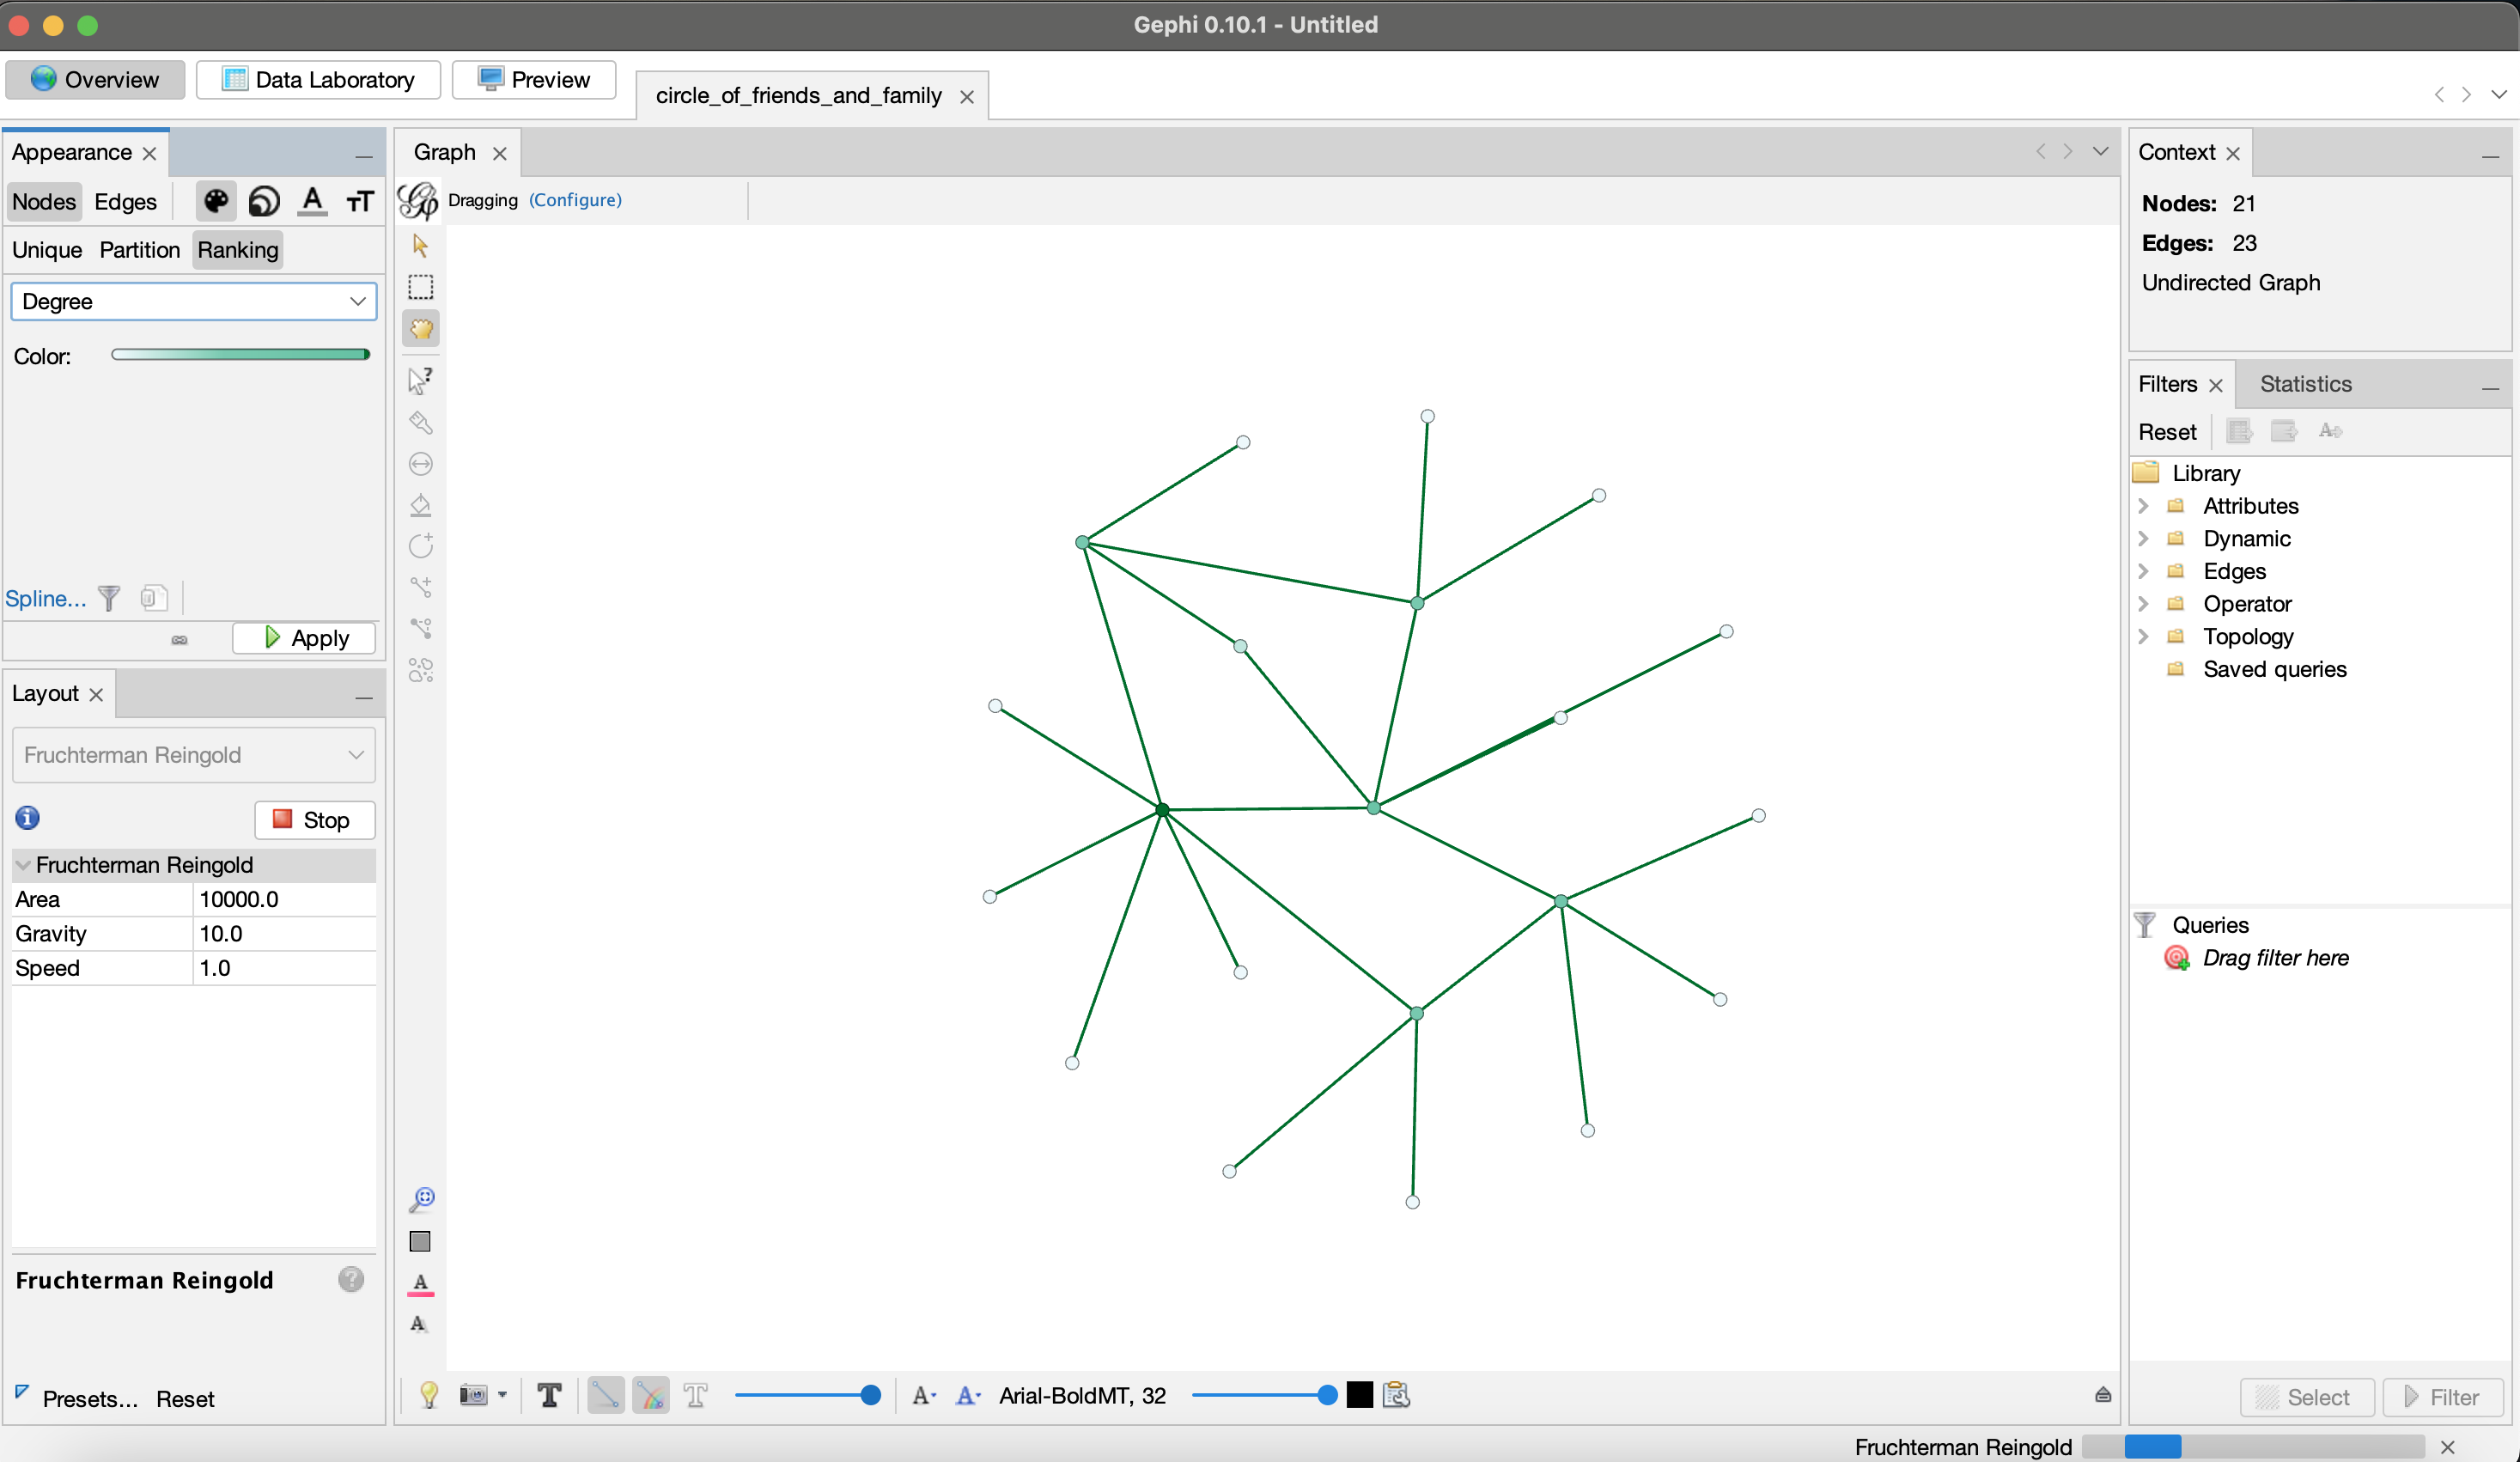

*(Optional) For each node, consider adding a categorical attribute which may be shared by other nodes (e.g., "child", "adult", "male", "father", etc.). Then, explore that attribute in your visualization. Are there any communities?*

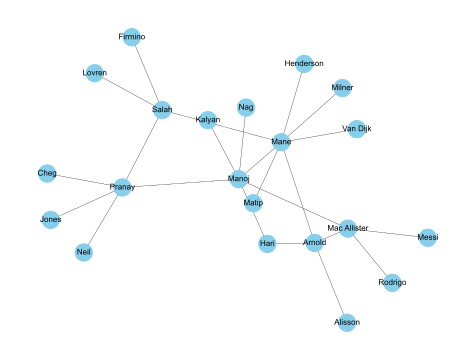

In [80]:
# Enter your code here ...

relations = {"Manoj": ["Hari", "Nag", "Kalyan", "Pranay"],
             "Pranay": ["Cheg", "Neil", "Jones", "Salah"],
             "Salah": ["Firmino", "Mane", "Lovren"],
             "Mane":["Henderson", "Milner", "Van Dijk", "Arnold", "Matip", "Manoj"],
             "Arnold": ["Alisson", "Mac Allister", "Hari"],
             "Mac Allister": ["Messi", "Rodrigo", "Manoj"]}

graph = nx.Graph()

for person in relations:
    graph.add_node(person)

for person, connections in relations.items():
    for connection in connections:
        graph.add_edge(person, connection)

#plotting the network
nx.draw(graph, with_labels=True, node_color='skyblue', width=.3, font_size=8)

nx.write_graphml(graph, "circle_of_friends_and_family.graphml")

## Exercise 2

Using the list of edges for the Game of Thrones graph (`G.edges`), create an **adjacency matrix** $A$ where $A_{i, j}$ represents the weight of the connection between node $i$ and $j$. So, for example, if our graph is simply the edges `[(1, 2, 1), (1, 3, 2)]`, then we have a node `1` connected to nodes `2` and `3` with weights `1` and `2` respectively. In this case, our adjacency matrix $A_{\text{example}}$ would be:

$$
A_{\text{example}} =
\begin{bmatrix}
0 & 1 & 2 \\
1 & 0 & 1 \\
2 & 1 & 0
\end{bmatrix}
$$

*Note: Since this is not a directional graph, the adjacency matrix is always symmetric! Also, there are no loops, so the diagonal is all 0s.*

**Only use [adjacency_matrix](https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html) as a reference. Do not use it to create the matrix itself; instead, use NumPy, for example.**

In [93]:
# Enter your code here ...

import numpy as np
import pandas as pd
import networkx as nx

node_mapping = {node: i for i, node in enumerate((G.nodes()))}
encoded_G = nx.relabel_nodes(G, node_mapping)

edges = encoded_G.edges
nodes = list(encoded_G.nodes)
num_nodes = len(nodes)

adjacency_matrix = np.zeros((num_nodes, num_nodes))

for edge in edges:
    node1, node2 = edge
    adjacency_matrix[node1][node2] = 1
    adjacency_matrix[node2][node1] = 1

adjacency_matrix

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## (BONUS) Exercise

Update the `geocode` function above so that it only pulls data for geocodes that are not already in the DataFrame.

*Hint: `.apply` functions can take in rows as arguments ...*

In [94]:
# Enter your code here ...

def geocode_1(loc):
    '''
    Geocode using GeoPy on a row of data.

    Returns a geopy.location.Location object.
    '''
    try:
        location = loc
        if location is not None:
            return location 

        loc = loc
        location = geolocator.geocode(loc)

    # for bulk API/URL searches, Timeout
    except Exception as e:
        print(f"-- {e} --\n\t", loc)
        return None
    
    if location is None:
        print("** None **\n\t", loc)
        return None
        
    return location

In [95]:
df_museums['geocode'] = df_museums['museum_name'].apply(geocode_1)

In [97]:
df_museums.head()

,state,museum_name,museum_type,museum_city,geocode,geo_importance,geo_class,geo_type,geo_address,geo_latitude,geo_longitude
0,Alabama,Barber Vintage Motorsports Museum,Auto/Transportation Museum,Birmingham,Barber Vintage Motorsports Museum,0.000010,tourism,museum,"Barber Vintage Motorsports Museum, Barber Moto...",33.533247,-86.614174
1,Alabama,USS Alabama Battleship Memorial Park,Boat Museum & Military Museum,Mobile,USS Alabama Battleship Memorial Park,0.315434,leisure,park,"USS Alabama Battleship Memorial Park, Mobile, ...",30.684383,-88.015274
2,Alaska,Fountainhead Antique Auto Museum,Auto/Transportation Museum,Fairbanks,Fountainhead Antique Auto Museum,0.000010,tourism,museum,"Fountainhead Antique Auto Museum, 212, Wedgewo...",64.860824,-147.713651
3,Arizona,Musical Instrument Museum,Music Museum,Phoenix,Musical Instrument Museum,0.254365,tourism,museum,"Musical Instrument Museum, 4725, East Mayo Bou...",33.667508,-111.978336
4,Arizona,Pima Air & Space Museum,Aircraft/Aviation Museum,Tucson,Pima Air & Space Museum,0.346844,tourism,museum,"Pima Air & Space Museum, 6000, East Valencia R...",32.136441,-110.865940


## (Optional) Google Geocoding API

The Google Geocoding API is superior to Nominatim, but it requires an API key and a Google Cloud Platform account to set it up. To enable the Google Geocoding API and get an API key, see [Get Started with Google Maps Platform](https://developers.google.com/maps/gmp-get-started) and [Get Started with Geocoding API](https://developers.google.com/maps/documentation/geocoding/start). However, keep in mind that **this will require you to provide your credit/debit card information.**

In [ ]:
#from geopy.geocoders import GoogleV3
#google_geolocator = GoogleV3(api_key="YOUR-API-KEY HERE")
#google_geolocator.geocode("Cayuga Street")